In [11]:
# Importong the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ==============================
# Step 1: Load the Data
# ==============================


# Load datasets
sales = pd.read_csv("/content/sales_data.csv")
products = pd.read_csv("/content/product_info.csv")
customers = pd.read_csv("/content/customer_info.csv")

print("Sales shape:", sales.shape)
print("Products shape:", products.shape)
print("Customers shape:", customers.shape)

# Preview
display(sales.head())
display(products.head())
display(customers.head())



Sales shape: (3000, 10)
Products shape: (30, 6)
Customers shape: (500, 6)


,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3,39.25,06-07-2025,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5,18.92,06-07-2025,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1,29.68,07-07-2025,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1,32.76,08-07-2025,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1,47.62,08-07-2025,DELAYED,Credit Card,West,0.20


,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,15-07-24,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,19-04-25,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,20-10-24,31.10,S559


,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,26-04-25,Male,Central,Silver
1,C00002,jpeterson@bernard.com,11-08-24,Female,Central,gold
2,C00003,howardmaurice@yahoo.com,15-05-25,male,Central,gold
3,C00004,yherrera@arnold.org,14-06-25,FEMALE,Central,GOLD
4,C00005,janetwilliams@gmail.com,02-05-25,Male,West,bronze


In [4]:

# ==============================
# Step 2: Clean the Data
# ==============================

# ---- Clean Sales Data ----
sales = sales.copy()

# Standardise text formatting
text_cols = ["delivery_status", "payment_method", "region"]
for col in text_cols:
    if col in sales.columns:
        sales[col] = sales[col].astype(str).str.strip().str.title()

# Convert dates
sales["order_date"] = pd.to_datetime(sales["order_date"], errors="coerce")

# Handle missing values
sales["discount_applied"] = pd.to_numeric(sales["discount_applied"], errors="coerce").fillna(0.0)

# Validate numeric columns
for col in ["quantity", "unit_price"]:
    sales[col] = pd.to_numeric(sales[col], errors="coerce")
    sales = sales[sales[col] >= 0]   # drop invalid negatives

# Remove duplicates
sales = sales.drop_duplicates(subset=["order_id"])

print("\nCleaned Sales Data Info:")
print(sales.info())
display(sales.head())


# ---- Clean Product Data ----
products = products.copy()

# Standardise text
for col in ["product_name", "category", "supplier_code"]:
    products[col] = products[col].astype(str).str.strip().str.title()

# Convert launch_date
products["launch_date"] = pd.to_datetime(products["launch_date"], errors="coerce")

# Handle missing categories
products["category"] = products["category"].replace(["", "nan", "NaN"], np.nan).fillna("Unknown")

# Validate numeric
products["base_price"] = pd.to_numeric(products["base_price"], errors="coerce")
products["base_price"] = products["base_price"].fillna(products["base_price"].median())

# Remove duplicates
products = products.drop_duplicates(subset=["product_id"])

print("\nCleaned Products Data Info:")
print(products.info())
display(products.head())


# ---- Clean Customer Data ----
customers = customers.copy()

# Standardise text
for col in ["gender", "region", "loyalty_tier"]:
    customers[col] = customers[col].astype(str).str.strip().str.title()

# Convert signup_date
customers["signup_date"] = pd.to_datetime(customers["signup_date"], errors="coerce")

# Handle missing loyalty tier
customers["loyalty_tier"] = customers["loyalty_tier"].replace(["", "nan", "NaN"], np.nan).fillna("Unknown")

# Remove duplicates
customers = customers.drop_duplicates(subset=["customer_id"])

print("\nCleaned Customers Data Info:")
print(customers.info())
display(customers.head())



Cleaned Sales Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2992 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2991 non-null   object        
 1   customer_id       2990 non-null   object        
 2   product_id        2987 non-null   object        
 3   quantity          2992 non-null   float64       
 4   unit_price        2992 non-null   float64       
 5   order_date        1176 non-null   datetime64[ns]
 6   delivery_status   2992 non-null   object        
 7   payment_method    2992 non-null   object        
 8   region            2992 non-null   object        
 9   discount_applied  2992 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 257.1+ KB
None


,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3.0,39.25,2025-06-07,Delivered,Paypal,Central,0.00
1,O696648,C00236,P0023,5.0,18.92,2025-06-07,Delayed,Credit Card,North,0.00
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1.0,32.76,2025-08-07,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1.0,47.62,2025-08-07,Delayed,Credit Card,West,0.20



Cleaned Products Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_id     30 non-null     object        
 1   product_name   30 non-null     object        
 2   category       30 non-null     object        
 3   launch_date    30 non-null     datetime64[ns]
 4   base_price     30 non-null     float64       
 5   supplier_code  30 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.5+ KB
None


/tmp/ipython-input-1542352144.py:41: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  products["launch_date"] = pd.to_datetime(products["launch_date"], errors="coerce")


,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,2025-11-03,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,2024-08-18,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,2025-04-19,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,2024-10-20,31.10,S559



Cleaned Customers Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 498 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   customer_id   497 non-null    object        
 1   email         492 non-null    object        
 2   signup_date   494 non-null    datetime64[ns]
 3   gender        498 non-null    object        
 4   region        498 non-null    object        
 5   loyalty_tier  498 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 27.2+ KB
None


/tmp/ipython-input-1542352144.py:66: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customers["signup_date"] = pd.to_datetime(customers["signup_date"], errors="coerce")


,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,2025-04-26,Male,Central,Silver
1,C00002,jpeterson@bernard.com,2024-11-08,Female,Central,Gold
2,C00003,howardmaurice@yahoo.com,2025-05-15,Male,Central,Gold
3,C00004,yherrera@arnold.org,2025-06-14,Female,Central,Gold
4,C00005,janetwilliams@gmail.com,2025-02-05,Male,West,Bronze


In [5]:
# ==============================
# Step 3: Merge the Data
# ==============================

# Merge sales + products on product_id
merged_df = pd.merge(
    sales,
    products,
    on="product_id",
    how="left"
)

# Merge with customers on customer_id
merged_df = pd.merge(
    merged_df,
    customers,
    on="customer_id",
    how="left"
)

print("\nMerged Dataset Info:")
print(merged_df.info())
display(merged_df.head())





Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2991 non-null   object        
 1   customer_id       2990 non-null   object        
 2   product_id        2987 non-null   object        
 3   quantity          2992 non-null   float64       
 4   unit_price        2992 non-null   float64       
 5   order_date        1176 non-null   datetime64[ns]
 6   delivery_status   2992 non-null   object        
 7   payment_method    2992 non-null   object        
 8   region_x          2992 non-null   object        
 9   discount_applied  2992 non-null   float64       
 10  product_name      2987 non-null   object        
 11  category          2987 non-null   object        
 12  launch_date       2987 non-null   datetime64[ns]
 13  base_price        2987 non-null   float64       
 14  su

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,product_name,category,launch_date,base_price,supplier_code,email,signup_date,gender,region_y,loyalty_tier
0,O966977,C00397,P0022,3.0,39.25,2025-06-07,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-04-10,19.77,S924,jacquelinemartin@mills-logan.com,2024-08-09,Female,North,Silver
1,O696648,C00236,P0023,5.0,18.92,2025-06-07,Delayed,Credit Card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907,georgeweber@morgan.com,2024-06-08,Other,North,Gold
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645,lcook@walters-smith.com,2024-09-25,Male,Central,Gold
3,O501803,C00031,P0003,1.0,32.76,2025-08-07,Cancelled,Credit Card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745,smoore@gmail.com,2024-07-28,Femle,Central,Gold
4,O322242,C00495,P0016,1.0,47.62,2025-08-07,Delayed,Credit Card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715,mcclainkatherine@hotmail.com,2024-09-18,Male,Central,Gold


In [18]:
# ==============================
# Step 4: Feature Engineering
# ==============================

# Revenue = quantity × unit_price × (1 - discount_applied)
merged_df["revenue"] = (
    merged_df["quantity"] * merged_df["unit_price"] * (1 - merged_df["discount_applied"])
)

# Order week (ISO week from order_date)
merged_df["order_week"] = merged_df["order_date"].dt.isocalendar().week

# Price band categorisation
merged_df["price_band"] = pd.cut(
    merged_df["unit_price"],
    bins=[-1, 15, 30, float("inf")],
    labels=["Low", "Medium", "High"]
)

# Days between launch_date and order_date
merged_df["days_to_order"] = (
    merged_df["order_date"] - merged_df["launch_date"]
).dt.days

# Email domain extraction
merged_df["email_domain"] = merged_df["email"].astype(str).str.split("@").str[-1]

# Is_late flag for delayed deliveries
merged_df["is_late"] = merged_df["delivery_status"].eq("Delayed")

print("\nFeature-Engineered Dataset Info:")
print(merged_df.info())
display(merged_df.head())



Feature-Engineered Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2991 non-null   object        
 1   customer_id       2990 non-null   object        
 2   product_id        2987 non-null   object        
 3   quantity          2992 non-null   float64       
 4   unit_price        2992 non-null   float64       
 5   order_date        1176 non-null   datetime64[ns]
 6   delivery_status   2992 non-null   object        
 7   payment_method    2992 non-null   object        
 8   region_x          2992 non-null   object        
 9   discount_applied  2992 non-null   float64       
 10  product_name      2987 non-null   object        
 11  category          2987 non-null   object        
 12  launch_date       2987 non-null   datetime64[ns]
 13  base_price        2987 non-null   float64   

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,...,region_y,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late,signup_month,revenue_scaled
0,O966977,C00397,P0022,3.0,39.25,2025-06-07,Delivered,Paypal,Central,0.00,...,North,Silver,117.750,23,High,423.0,mills-logan.com,False,2024-08,0.457431
1,O696648,C00236,P0023,5.0,18.92,2025-06-07,Delayed,Credit Card,North,0.00,...,North,Gold,94.600,23,Medium,140.0,morgan.com,True,2024-06,0.361987
2,O202644,C00492,P0011,1.0,29.68,2025-07-07,Delivered,Bank Transfer,North,0.15,...,Central,Gold,25.228,28,Medium,104.0,walters-smith.com,False,2024-09,0.075976
3,O501803,C00031,P0003,1.0,32.76,2025-08-07,Cancelled,Credit Card,Central,0.20,...,Central,Gold,26.208,32,High,388.0,gmail.com,False,2024-07,0.080016
4,O322242,C00495,P0016,1.0,47.62,2025-08-07,Delayed,Credit Card,West,0.20,...,Central,Gold,38.096,32,High,168.0,hotmail.com,True,2024-09,0.129029


In [19]:
# ==============================
# Step 5: Create Summary Tables
# ==============================

# Weekly revenue trends by region
weekly_revenue_region = (
    merged_df.groupby(["order_week", "region_x"])["revenue"]
    .sum()
    .reset_index()
)

# Product category performance
category_performance = (
    merged_df.groupby("category")
    .agg({
        "revenue": "sum",
        "quantity": "sum",
        "discount_applied": "mean"
    })
    .reset_index()
)

# Customer behaviour by loyalty tier & signup month
merged_df["signup_month"] = merged_df["signup_date"].dt.to_period("M")
customer_behaviour = (
    merged_df.groupby(["loyalty_tier", "signup_month"])
    .agg({
        "customer_id": "nunique",
        "revenue": "sum"
    })
    .reset_index()
)

# Delivery performance by region and price_band
delivery_performance = (
    merged_df.groupby(["region_x", "price_band", "delivery_status"])
    .size()
    .reset_index(name="order_count")
)

# Preferred payment methods by loyalty_tier
payment_methods = (
    merged_df.groupby(["loyalty_tier", "payment_method"])
    .size()
    .reset_index(name="count")
)

# Display summary tables
display(weekly_revenue_region.head())
display(category_performance.head())
display(customer_behaviour.head())
display(delivery_performance.head())
display(payment_methods.head())

/tmp/ipython-input-2507679816.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby(["region_x", "price_band", "delivery_status"])


,order_week,region_x,revenue
0,1,East,173.8310
1,1,North,20.7825
2,1,South,55.8790
3,1,West,325.3200
4,2,Central,2248.1720


,category,revenue,quantity,discount_applied
0,Cleaning,93621.7840,3584.0,0.085566
1,Kitchen,33933.6760,1226.0,0.075622
2,Outdoors,40062.0680,1519.0,0.082016
3,Personal Care,24916.6365,902.0,0.086755
4,Storage,46931.4575,1730.0,0.081043


,loyalty_tier,signup_month,customer_id,revenue
0,Brnze,2024-07,1,513.4745
1,Brnze,2025-04,1,290.0715
2,Bronze,2024-01,2,478.6450
3,Bronze,2024-02,3,1843.8570
4,Bronze,2024-03,2,1142.6895


,region_x,price_band,delivery_status,order_count
0,Central,Low,Cancelled,26
1,Central,Low,Delayed,43
2,Central,Low,Delivered,44
3,Central,Low,Delrd,0
4,Central,Low,Delyd,0


,loyalty_tier,payment_method,count
0,Brnze,Bank Transfer,2
1,Brnze,Credit Card,5
2,Brnze,Paypal,4
3,Bronze,Bank Transfer,177
4,Bronze,Credit Card,279


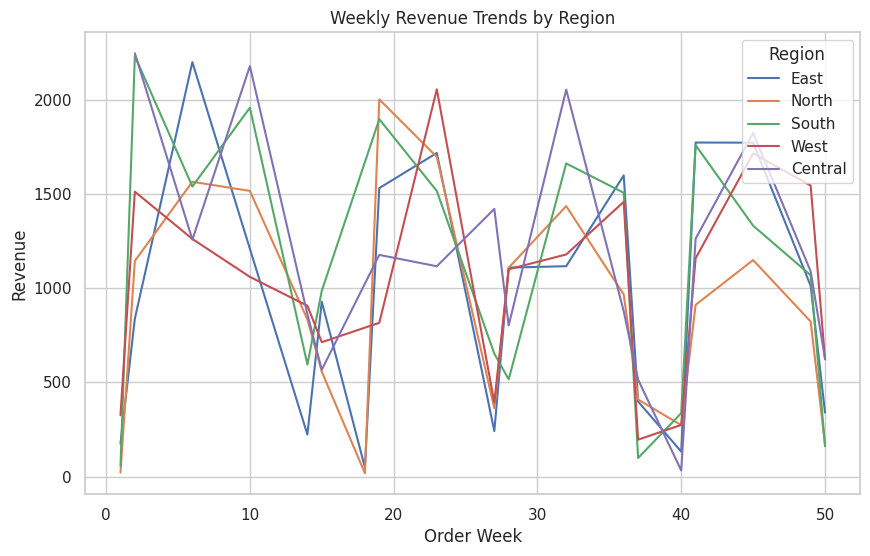

/tmp/ipython-input-3171067999.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_categories, x="category", y="revenue", palette="viridis")


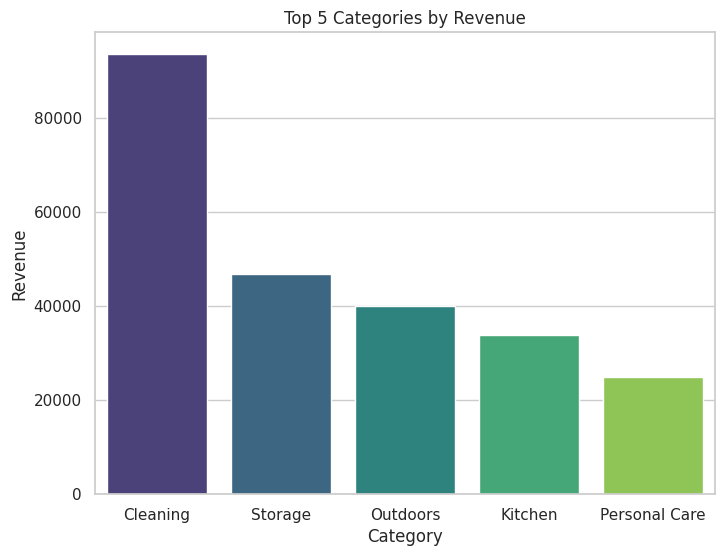

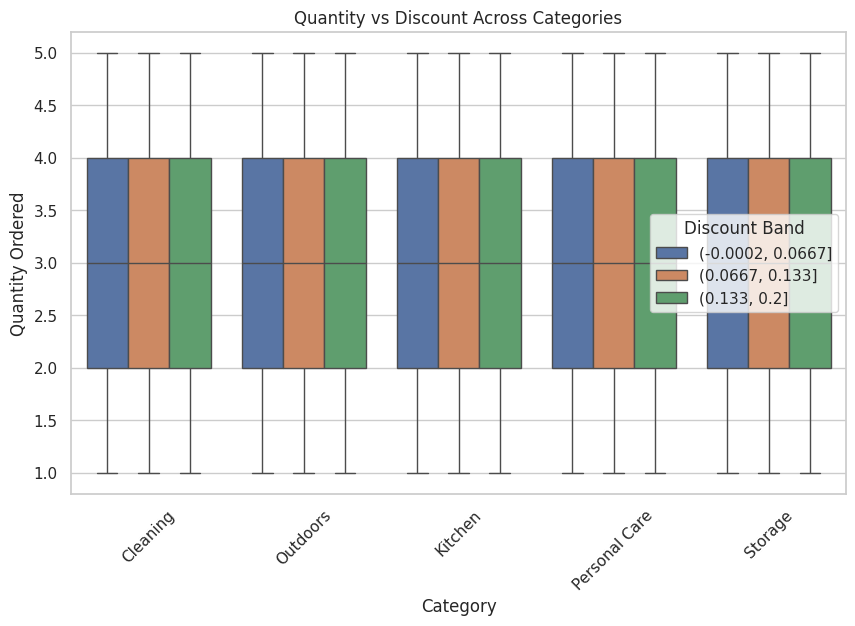

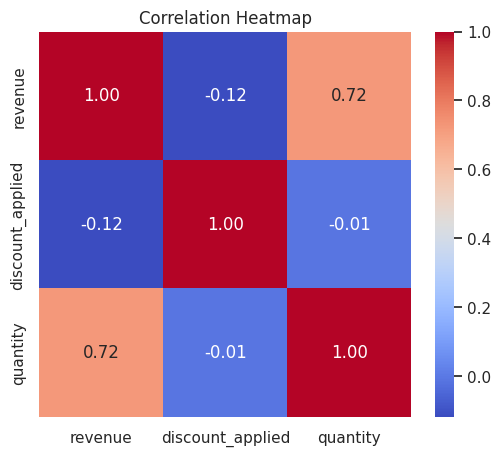

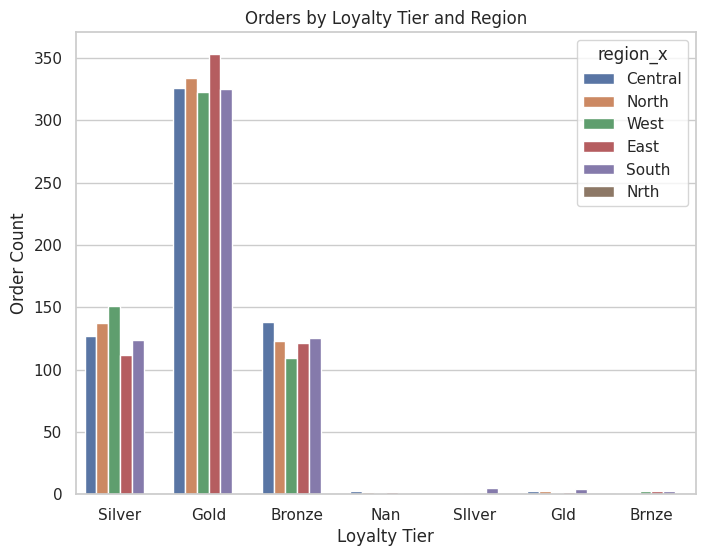

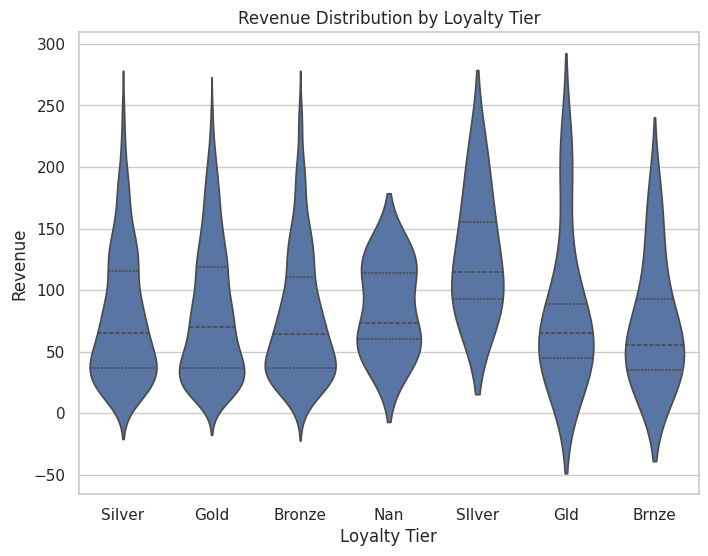

In [20]:
# ==============================
# Step 6: Visual Exploration
# ==============================

sns.set(style="whitegrid")

# 1. Line plot - Weekly revenue trends by region
plt.figure(figsize=(10,6))
sns.lineplot(data=weekly_revenue_region, x="order_week", y="revenue", hue="region_x")
plt.title("Weekly Revenue Trends by Region")
plt.xlabel("Order Week")
plt.ylabel("Revenue")
plt.legend(title="Region")
plt.show()


# 2. Bar chart - Top 5 categories by revenue
top5_categories = category_performance.sort_values("revenue", ascending=False).head(5)
plt.figure(figsize=(8,6))
sns.barplot(data=top5_categories, x="category", y="revenue", palette="viridis")
plt.title("Top 5 Categories by Revenue")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()


# 3. Boxplot - Quantity vs Discount across categories
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x="category", y="quantity", hue=pd.cut(merged_df["discount_applied"], bins=3))
plt.title("Quantity vs Discount Across Categories")
plt.xlabel("Category")
plt.ylabel("Quantity Ordered")
plt.legend(title="Discount Band")
plt.xticks(rotation=45)
plt.show()


# 4. Heatmap - Correlation between revenue, discount, and quantity
corr = merged_df[["revenue", "discount_applied", "quantity"]].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# 5. Countplot - Orders by loyalty tier (hue = region)
plt.figure(figsize=(8,6))
sns.countplot(data=merged_df, x="loyalty_tier", hue="region_x")
plt.title("Orders by Loyalty Tier and Region")
plt.xlabel("Loyalty Tier")
plt.ylabel("Order Count")
plt.show()


# 6. Violin Plot - Revenue distribution by loyalty_tier
plt.figure(figsize=(8,6))
sns.violinplot(data=merged_df, x="loyalty_tier", y="revenue", inner="quartile")
plt.title("Revenue Distribution by Loyalty Tier")
plt.xlabel("Loyalty Tier")
plt.ylabel("Revenue")
plt.show()

In [14]:
# ==============================
# Step 7: Business Questions
# ==============================

# 1. Which product categories drive the most revenue, and in which regions?
category_region_revenue = (
    merged_df.groupby(["category", "region_x"])["revenue"]
    .sum()
    .reset_index()
    .sort_values("revenue", ascending=False)
)
display(category_region_revenue.head(10))


# 4. Do discounts lead to more items sold?
discount_effect = merged_df.groupby(pd.cut(merged_df["discount_applied"], bins=3))["quantity"].mean()
display(discount_effect)


# 5. Which loyalty tier generates the most value?
loyalty_value = merged_df.groupby("loyalty_tier")["revenue"].sum().sort_values(ascending=False)
display(loyalty_value)


# 6. Are certain regions struggling with delivery delays?
delivery_issues = (
    merged_df.groupby(["region_x", "is_late"])
    .size()
    .reset_index(name="order_count")
)
late_percentage = delivery_issues[delivery_issues["is_late"]].groupby("region_x")["order_count"].sum()
total_orders = merged_df.groupby("region_x")["order_id"].count()
late_ratio = (late_percentage / total_orders * 100).sort_values(ascending=False)
display(late_ratio)


# 7. Do customer signup patterns influence purchasing activity?
signup_activity = (
    merged_df.groupby(merged_df["signup_date"].dt.to_period("M"))["revenue"].sum()
)
display(signup_activity)



,category,region_x,revenue
1,Cleaning,East,19911.2990
3,Cleaning,South,18887.3650
2,Cleaning,North,18766.1035
4,Cleaning,West,18038.1790
0,Cleaning,Central,18018.8375
25,Storage,West,10014.4465
21,Storage,East,9498.1305
20,Storage,Central,9358.4750
24,Storage,South,9345.3590
13,Outdoors,South,9327.4165


/tmp/ipython-input-1943624536.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_effect = merged_df.groupby(pd.cut(merged_df["discount_applied"], bins=3))["quantity"].mean()


,quantity
discount_applied,
"(-0.0002, 0.0667]",3.026738
"(0.0667, 0.133]",2.982213
"(0.133, 0.2]",2.975758


,revenue
loyalty_tier,
Gold,135702.8175
Silver,51255.2485
Bronze,48359.7190
Gld,1084.9690
Brnze,803.5460
Sllver,777.3595
Nan,767.2730


,0
region_x,
East,41.569282
North,39.238411
Central,39.036545
South,38.552189
West,37.055838
Nrth,NaN


,revenue
signup_date,
2024-01,4057.8275
2024-02,3554.4855
2024-03,3744.4955
2024-04,2467.9055
2024-05,1731.5695
2024-06,6561.6515
2024-07,13980.8475
2024-08,16941.4660
2024-09,18615.2355
